In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from string import punctuation
import string

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Bidirectional, Lambda, BatchNormalization, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten,Dropout, GlobalMaxPooling1D
from tensorflow.keras import layers, utils, callbacks, optimizers, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
from tqdm import tqdm

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
train = pd.read_excel('/content/gdrive/MyDrive/Tesis/0.001/Dataset jkt train6.xlsx', engine='openpyxl')
train = train.astype(str)
val = pd.read_excel('/content/gdrive/MyDrive/Tesis/0.001/Dataset jkt val6.xlsx', engine='openpyxl')
val = val.astype(str)
test = pd.read_excel("/content/gdrive/MyDrive/Tesis/0.001/Dataset test jkt fix6.xlsx", engine='openpyxl')
test = test.astype(str)

In [ ]:
train.head()

,Nomer,Perkara,Pihak,Link,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,question1,question2
0,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,170.0,(1) Barang siapa dengan terang-terangan dan de...,0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Barang terang terangan tenaga kekerasan orang ...
1,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,363.0,(1) Diancam dengan pidana penjara paling lama ...,0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Diancam pidana penjara tujuh pencurian ternak ...
2,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,362.0,"Barang siapa mengambil barang sesuatu, yang se...",0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Barang mengambil barang kepunyaan orang maksud...
3,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,372.0,Barang siapa dengan sengaja dan melawan hukum ...,0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Barang sengaja melawan hukum memiliki barang k...
4,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,303.0,(1) Diancam dengan pidana penjara paling lama ...,0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Diancam pidana penjara sepuluh pidana denda pu...


In [ ]:
val.head()

,Nomer,Perkara,Pihak,Link,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,question1,question2
0,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,170.0,(1) Barang siapa dengan terang-terangan dan de...,0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Barang terang terangan tenaga kekerasan orang ...
1,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,363.0,(1) Diancam dengan pidana penjara paling lama ...,0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Diancam pidana penjara tujuh pencurian ternak ...
2,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,362.0,"Barang siapa mengambil barang sesuatu, yang se...",0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Barang mengambil barang kepunyaan orang maksud...
3,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,372.0,Barang siapa dengan sengaja dan melawan hukum ...,0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Barang sengaja melawan hukum memiliki barang k...
4,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,303.0,(1) Diancam dengan pidana penjara paling lama ...,0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Diancam pidana penjara sepuluh pidana denda pu...


In [ ]:
test.head()

,Nomer,Perkara,Pihak,Link,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,question1,question2
0,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,170.0,(1) Barang siapa dengan terang-terangan dan de...,0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Barang terang terangan tenaga kekerasan orang ...
1,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,363.0,(1) Diancam dengan pidana penjara paling lama ...,0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Diancam pidana penjara tujuh pencurian ternak ...
2,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,362.0,"Barang siapa mengambil barang sesuatu, yang se...",1,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Barang mengambil barang kepunyaan orang maksud...
3,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,372.0,Barang siapa dengan sengaja dan melawan hukum ...,0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Barang sengaja melawan hukum memiliki barang k...
4,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,303.0,(1) Diancam dengan pidana penjara paling lama ...,0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Diancam pidana penjara sepuluh pidana denda pu...


# Preprocessing

In [ ]:
#train, test = train_test_split(data, stratify=data.is_duplicate, test_size=0.2)

In [ ]:
MAX_SEQUENCE_LENGTH = 30
EMBEDDING_DIM = 100

In [ ]:
corpus = []

feats = ['question1','question2']
for f in feats:
    train[f] = train[f].astype(str)
    val[f] = val[f].astype(str)
    test[f] = test[f].astype(str)
    corpus+=train[f].values.tolist()
    corpus+=val[f].values.tolist()
    corpus+=test[f].values.tolist()


tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
X_q1 = tokenizer.texts_to_sequences(train['question1'])
X_q2 = tokenizer.texts_to_sequences(train['question2'])

X_val_q1 = tokenizer.texts_to_sequences(val['question1'])
X_val_q2 = tokenizer.texts_to_sequences(val['question2'])

X_test_q1 = tokenizer.texts_to_sequences(test['question1'])
X_test_q2 = tokenizer.texts_to_sequences(test['question2'])


X_q1 = pad_sequences(X_q1, maxlen=MAX_SEQUENCE_LENGTH)
X_q2 = pad_sequences(X_q2, maxlen=MAX_SEQUENCE_LENGTH)
X_val_q1 = pad_sequences(X_val_q1, maxlen=MAX_SEQUENCE_LENGTH)
X_val_q2 = pad_sequences(X_val_q2, maxlen=MAX_SEQUENCE_LENGTH)
X_test_q1 = pad_sequences(X_test_q1, maxlen=MAX_SEQUENCE_LENGTH)
X_test_q2 = pad_sequences(X_test_q2, maxlen=MAX_SEQUENCE_LENGTH)

#y = train['Kemiripan'].values

word_index = tokenizer.word_index
nb_words = len(word_index)+1

# Word Embedding

In [ ]:
import re, nltk, gensim
# Loading pre-trained word vectors
def load_embedding(EMBEDDING_FILE,embedding_dim):
  word2vec_model = gensim.models.KeyedVectors.\
  load_word2vec_format(EMBEDDING_FILE, binary = True)
  w2v = dict(zip(word2vec_model.index_to_key,\
                 word2vec_model.vectors))

# This will be the embedding matrix
  embeddings = 1 * np.random.randn(len(word_index) \
                                   + 1, embedding_dim)
  embeddings[0] = 0  # So that the padding will be ignored


# Build the embedding matrix
  for word, index in word_index.items():
      if word in word2vec_model.index_to_key:
          embeddings[index] = word2vec_model.get_vector(word)
  return embeddings

embedding_dim=100
EMBEDDING_FILE = '/content/gdrive/MyDrive/Tesis/0.001/fasttext_model_jkt_wiki6.bin'

embeddings=load_embedding(EMBEDDING_FILE,embedding_dim)

In [ ]:
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
#X_train_q1,X_val_q1,X_train_q2,X_val_q2,y_train,y_val = train_test_split(X_q1,X_q2,y,train_size=0.8,random_state=1024)
print(X_q1.shape,X_val_q1.shape,X_test_q1.shape)
X_train = [X_q1,X_q2]
X_val = [X_val_q1,X_val_q2]
X_test = [X_test_q1,X_test_q2]

(82480, 30) (10300, 30) (10320, 30)


In [ ]:
y_train = train['Kemiripan'].values
y_val = val['Kemiripan'].values
y_test = test['Kemiripan'].values

In [ ]:
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

## Euclidean distance and Cosine distance

In [ ]:
#Cosine distance
#def cosine_distance(output):
#  x, y= output[0],output[1]
#  x = K.l2_normalize(x, axis=-1)
#  y = K.l2_normalize(y, axis=-1)
#  return -K.mean(x * y, axis=-1, keepdims=True)

def cosine_distance(inputs):
    x, y = inputs
    x = tf.keras.backend.l2_normalize(x, axis=-1)
    y = tf.keras.backend.l2_normalize(y, axis=-1)
    return tf.keras.backend.sum(x * y, axis=-1, keepdims=True)

def euclidean_distance(output):
    x, y = output[0],output[1]
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

In [ ]:
from tensorflow.keras.layers import Reshape
from tensorflow.keras.metrics import Precision, Recall

# BiLSTM

## DropOut 0.2

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(embedded_sequences_q1)
x1 = Dropout(0.2)(x1)
x2 = lstm_layer(embedded_sequences_q2)
x2 = Dropout(0.2)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model11 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model11.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model11.summary()
utils.plot_model(model11, show_shapes=True, expand_nested=True)
cp11=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_02.hdf5',monitor='val_accuracy',verbose=1,save_best_only=False)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 30, 100)              2726000   ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 bidirectional (Bidirection  (None, 516)                  740976    ['embedding[0][0]',       

In [ ]:
history_f_bilstm = model11.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp11]
)

Epoch 1/20
2574/2578 [============================>.] - ETA: 0s - loss: 0.2296 - accuracy: 0.9481 - precision: 0.0825 - recall: 0.0039
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_02.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - 43s 12ms/step - loss: 0.2296 - accuracy: 0.9480 - precision: 0.0825 - recall: 0.0039 - val_loss: 0.1648 - val_accuracy: 0.9510 - val_precision: 1.0000 - val_recall: 0.0194
Epoch 2/20
2576/2578 [============================>.] - ETA: 0s - loss: 0.1387 - accuracy: 0.9541 - precision: 0.9565 - recall: 0.0854
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_02.hdf5
2578/2578 [==============================] - 29s 11ms/step - loss: 0.1387 - accuracy: 0.9541 - precision: 0.9566 - recall: 0.0856 - val_loss: 0.0994 - val_accuracy: 0.9628 - val_precision: 0.7500 - val_recall: 0.3845
Epoch 3/20
2576/2578 [============================>.] - ETA: 0s - loss: 0.0922 - accuracy: 0.9686 - precision: 0.9368 - recall: 0.3992
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_02.hdf5
2578/2578 [==============================] - 29s 11ms/step - loss: 0.0922 - accuracy: 0.9686 - precision: 

In [ ]:
y_pred_test = model11.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission11 = test.copy()
submission11['Kemiripan'] = submission11['Kemiripan'].astype('float32')
submission11['predict'] = y_pred_test
submission11['predict'] = submission11['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission11.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_bilstm_02.csv',index=False)

323/323 [==============================] - 3s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+BiLSTM 20 Epoch 0.2')
print('---------------------------')
print(classification_report(submission11['Kemiripan'],submission11['predict']))
print('---------------------------')

Model Metrics for FastText+BiLSTM 20 Epoch 0.2
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.80      0.77      0.78       516

    accuracy                           0.98     10320
   macro avg       0.90      0.88      0.89     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission11['Accuracy'] = (submission11['Kemiripan'] == submission11['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission11['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9789728682170543


In [ ]:
submission11 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_bilstm_02.csv')
submission11 = submission11.astype(str)

In [ ]:
df = submission11

# Menambahkan kolom baru 'C' sesuai aturan yang diberikan
df['koreksi'] = (df['Kemiripan'] == '1.0') & (df['predict'] == '1.0')

# Mengganti nilai True/False dengan 1/0
df['koreksi'] = df['koreksi'].astype(int)

# Mengurutkan DataFrame berdasarkan kolom 'C' secara descending
df = df.sort_values(by='koreksi', ascending=False)
df = df.astype(str)

import pandas as pd

#df = submission31

# List of row counts to consider
row_counts = [5, 10, 20]

# Dictionary to store MRR values for different row counts
mrr_values_dict = {}

for count in row_counts:
    mrr_values = []
    for kasus in df['Kasus'].unique():
        group = df[df['Kasus'] == kasus].head(count)  # Select the top 'count' rows for each 'Kasus'
        reciprocal_rank = 0
        rank = 1
        rr_values = []
        for prediction in group['koreksi']:
            if prediction == '1':
                reciprocal_rank = 1 / rank  # Calculate reciprocal rank
                rank += 1
            elif prediction == '0':
                reciprocal_rank = 0  # Calculate reciprocal rank
                rank += 1
            rr_values.append(reciprocal_rank)
        mrr = sum(rr_values) / len(rr_values)
        mrr_values.append(mrr)

    mrr_values_dict[f'Top {count} Rows'] = mrr_values

# Print MRR values for different row counts
for key, mrr_values in mrr_values_dict.items():
    print(f"Reciprocal Ranks for each Kasus ({key}):")
    mrr_df = pd.DataFrame({'Kasus': df['Kasus'].unique(), 'MRR': mrr_values})
    #print(mrr_df)
    print(f"Average MRR ({key}):", sum(mrr_values) / len(mrr_values))
    print()

Reciprocal Ranks for each Kasus (Top 5 Rows):
Average MRR (Top 5 Rows): 0.1533980582524283

Reciprocal Ranks for each Kasus (Top 10 Rows):
Average MRR (Top 10 Rows): 0.07669902912621415

Reciprocal Ranks for each Kasus (Top 20 Rows):
Average MRR (Top 20 Rows): 0.038359734287174534



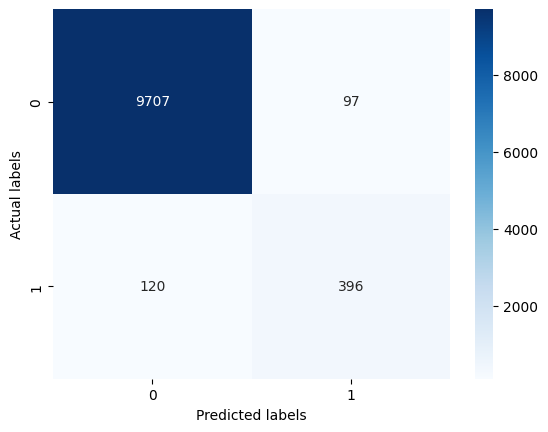

In [ ]:
actual_labels = submission11['Kemiripan']  # Replace 'actual_column_name' with your actual column name
predicted_labels = submission11['predict']

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(actual_labels, predicted_labels)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()

In [ ]:
import pandas as pd

df = submission11

# List of row counts to consider
row_counts = [5, 10, 20]

# Dictionary to store MRR values for different row counts
mrr_values_dict = {}

for count in row_counts:
    mrr_values = []
    for kasus in df['Kasus'].unique():
        group = df[df['Kasus'] == kasus].head(count)  # Select the top 'count' rows for each 'Kasus'
        reciprocal_rank = 0
        rank = 1
        rr_values = []
        for prediction in group['predict']:
            if prediction == '1.0':
                reciprocal_rank = 1 / rank  # Calculate reciprocal rank
                rank += 1
            elif prediction == '0.0':
                reciprocal_rank = 0  # Calculate reciprocal rank
                rank += 1
            rr_values.append(reciprocal_rank)
        mrr = sum(rr_values) / len(rr_values)
        mrr_values.append(mrr)

    mrr_values_dict[f'Top {count} Rows'] = mrr_values

# Print MRR values for different row counts
for key, mrr_values in mrr_values_dict.items():
    print(f"Reciprocal Ranks for each Kasus ({key}):")
    mrr_df = pd.DataFrame({'Kasus': df['Kasus'].unique(), 'MRR': mrr_values})
    #print(mrr_df)
    print(f"Average MRR ({key}):", sum(mrr_values) / len(mrr_values))
    print()

Reciprocal Ranks for each Kasus (Top 5 Rows):
Average MRR (Top 5 Rows): 0.0511262135922331

Reciprocal Ranks for each Kasus (Top 10 Rows):
Average MRR (Top 10 Rows): 0.030077284635537133

Reciprocal Ranks for each Kasus (Top 20 Rows):
Average MRR (Top 20 Rows): 0.01504030302292953



## DropOut 0.3

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(embedded_sequences_q1)
x1 = Dropout(0.3)(x1)
x2 = lstm_layer(embedded_sequences_q2)
x2 = Dropout(0.3)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model12 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model12.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model12.summary()
utils.plot_model(model12, show_shapes=True, expand_nested=True)
cp12=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_03.hdf5',monitor='val_accuracy',verbose=1,save_best_only=False)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 30, 100)              2726000   ['input_3[0][0]',             
                                                                     'input_4[0][0]']             
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 516)                  740976    ['embedding_1[0][0]',   

In [ ]:
history_f_bilstm = model12.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp12]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.2710 - accuracy: 0.9482 - precision_1: 0.0760 - recall_1: 0.0032
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_03.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - 38s 12ms/step - loss: 0.2710 - accuracy: 0.9482 - precision_1: 0.0760 - recall_1: 0.0032 - val_loss: 0.1773 - val_accuracy: 0.9500 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/20
2575/2578 [============================>.] - ETA: 0s - loss: 0.1609 - accuracy: 0.9500 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_03.hdf5
2578/2578 [==============================] - 30s 12ms/step - loss: 0.1609 - accuracy: 0.9500 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.1193 - val_accuracy: 0.9555 - val_precision_1: 0.7714 - val_recall_1: 0.1573
Epoch 3/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.1166 - accuracy: 0.9537 - precision_1: 0.9449 - recall_1: 0.0791
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_03.hdf5
2578/2578 [==============================] - 30s 12ms/step

In [ ]:
y_pred_test = model12.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission12 = test.copy()
submission12['Kemiripan'] = submission12['Kemiripan'].astype('float32')
submission12['predict'] = y_pred_test
submission12['predict'] = submission12['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission12.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_bilstm_03.csv',index=False)

323/323 [==============================] - 3s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+BiLSTM 20 Epoch 0.3')
print('---------------------------')
print(classification_report(submission12['Kemiripan'],submission12['predict']))
print('---------------------------')

Model Metrics for FastText+BiLSTM 20 Epoch 0.3
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.78      0.81      0.80       516

    accuracy                           0.98     10320
   macro avg       0.89      0.90      0.89     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission12['Accuracy'] = (submission12['Kemiripan'] == submission12['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission12['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9794573643410853


In [ ]:
submission12 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_bilstm_03.csv')
submission12 = submission12.astype(str)

In [ ]:
import pandas as pd

df = submission12

# List of row counts to consider
row_counts = [5, 10, 20]

# Dictionary to store MRR values for different row counts
mrr_values_dict = {}

for count in row_counts:
    mrr_values = []
    for kasus in df['Kasus'].unique():
        group = df[df['Kasus'] == kasus].head(count)  # Select the top 'count' rows for each 'Kasus'
        reciprocal_rank = 0
        rank = 1
        rr_values = []
        for prediction in group['predict']:
            if prediction == '1.0':
                reciprocal_rank = 1 / rank  # Calculate reciprocal rank
                rank += 1
            elif prediction == '0.0':
                reciprocal_rank = 0  # Calculate reciprocal rank
                rank += 1
            rr_values.append(reciprocal_rank)
        mrr = sum(rr_values) / len(rr_values)
        mrr_values.append(mrr)

    mrr_values_dict[f'Top {count} Rows'] = mrr_values

# Print MRR values for different row counts
for key, mrr_values in mrr_values_dict.items():
    print(f"Reciprocal Ranks for each Kasus ({key}):")
    mrr_df = pd.DataFrame({'Kasus': df['Kasus'].unique(), 'MRR': mrr_values})
    #print(mrr_df)
    print(f"Average MRR ({key}):", sum(mrr_values) / len(mrr_values))
    print()

Reciprocal Ranks for each Kasus (Top 5 Rows):
Average MRR (Top 5 Rows): 0.0588478964401296

Reciprocal Ranks for each Kasus (Top 10 Rows):
Average MRR (Top 10 Rows): 0.03349075358298671

Reciprocal Ranks for each Kasus (Top 20 Rows):
Average MRR (Top 20 Rows): 0.016811966759098535



## DropOut 0.5

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(embedded_sequences_q1)
x1 = Dropout(0.5)(x1)
x2 = lstm_layer(embedded_sequences_q2)
x2 = Dropout(0.5)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model13 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model13.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model13.summary()
utils.plot_model(model13, show_shapes=True, expand_nested=True)
cp13=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_05.hdf5',monitor='val_accuracy',verbose=1,save_best_only=False)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 30, 100)              2726000   ['input_9[0][0]',             
                                                                     'input_10[0][0]']            
                                                                                                  
 bidirectional_4 (Bidirecti  (None, 516)                  740976    ['embedding_4[0][0]',   

In [ ]:
history_f_bilstm = model13.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp13]
)

Epoch 1/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.2666 - accuracy: 0.9473 - precision_4: 0.0332 - recall_4: 0.0019
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_05.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - 37s 12ms/step - loss: 0.2666 - accuracy: 0.9473 - precision_4: 0.0332 - recall_4: 0.0019 - val_loss: 0.1837 - val_accuracy: 0.9500 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 2/20
2573/2578 [============================>.] - ETA: 0s - loss: 0.1747 - accuracy: 0.9500 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_05.hdf5
2578/2578 [==============================] - 29s 11ms/step - loss: 0.1746 - accuracy: 0.9500 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_loss: 0.1374 - val_accuracy: 0.9550 - val_precision_4: 0.7708 - val_recall_4: 0.1437
Epoch 3/20
2574/2578 [============================>.] - ETA: 0s - loss: 0.1370 - accuracy: 0.9507 - precision_4: 0.9538 - recall_4: 0.0150
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_05.hdf5
2578/2578 [==============================] - 29s 11ms/step

In [ ]:
y_pred_test = model13.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission13 = test.copy()
submission13['Kemiripan'] = submission13['Kemiripan'].astype('float32')
submission13['predict'] = y_pred_test
submission13['predict'] = submission13['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission13.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_bilstm_05.csv',index=False)

323/323 [==============================] - 3s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+BiLSTM 20 Epoch 0.5')
print('---------------------------')
print(classification_report(submission13['Kemiripan'],submission13['predict']))
print('---------------------------')

Model Metrics for FastText+BiLSTM 20 Epoch 0.5
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      9804
         1.0       0.66      0.86      0.75       516

    accuracy                           0.97     10320
   macro avg       0.83      0.92      0.87     10320
weighted avg       0.98      0.97      0.97     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission13['Accuracy'] = (submission13['Kemiripan'] == submission13['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission13['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9712209302325582


In [ ]:
submission13 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_bilstm_05.csv')
submission13 = submission13.astype(str)

In [ ]:
import pandas as pd

df = submission13

# List of row counts to consider
row_counts = [5, 10, 20]

# Dictionary to store MRR values for different row counts
mrr_values_dict = {}

for count in row_counts:
    mrr_values = []
    for kasus in df['Kasus'].unique():
        group = df[df['Kasus'] == kasus].head(count)  # Select the top 'count' rows for each 'Kasus'
        reciprocal_rank = 0
        rank = 1
        rr_values = []
        for prediction in group['predict']:
            if prediction == '1.0':
                reciprocal_rank = 1 / rank  # Calculate reciprocal rank
                rank += 1
            elif prediction == '0.0':
                reciprocal_rank = 0  # Calculate reciprocal rank
                rank += 1
            rr_values.append(reciprocal_rank)
        mrr = sum(rr_values) / len(rr_values)
        mrr_values.append(mrr)

    mrr_values_dict[f'Top {count} Rows'] = mrr_values

# Print MRR values for different row counts
for key, mrr_values in mrr_values_dict.items():
    print(f"Reciprocal Ranks for each Kasus ({key}):")
    mrr_df = pd.DataFrame({'Kasus': df['Kasus'].unique(), 'MRR': mrr_values})
    #print(mrr_df)
    print(f"Average MRR ({key}):", sum(mrr_values) / len(mrr_values))
    print()

Reciprocal Ranks for each Kasus (Top 5 Rows):
Average MRR (Top 5 Rows): 0.07095145631067981

Reciprocal Ranks for each Kasus (Top 10 Rows):
Average MRR (Top 10 Rows): 0.041125057790106466

Reciprocal Ranks for each Kasus (Top 20 Rows):
Average MRR (Top 20 Rows): 0.02056790033335773



## DropOut 0.7

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(embedded_sequences_q1)
x1 = Dropout(0.7)(x1)
x2 = lstm_layer(embedded_sequences_q2)
x2 = Dropout(0.7)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model14 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model14.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model14.summary()
utils.plot_model(model14, show_shapes=True, expand_nested=True)
cp14=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_07.hdf5',monitor='val_accuracy',verbose=1,save_best_only=False)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 30, 100)              2726000   ['input_7[0][0]',             
                                                                     'input_8[0][0]']             
                                                                                                  
 bidirectional_3 (Bidirecti  (None, 516)                  740976    ['embedding_3[0][0]',   

In [ ]:
history_f_bilstm = model14.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp14]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.3175 - accuracy: 0.9466 - precision_3: 0.0646 - recall_3: 0.0051
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_07.hdf5
2578/2578 [==============================] - 47s 15ms/step - loss: 0.3175 - accuracy: 0.9466 - precision_3: 0.0646 - recall_3: 0.0051 - val_loss: 0.1895 - val_accuracy: 0.9500 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/20
   6/2578 [..............................] - ETA: 33s - loss: 0.2264 - accuracy: 0.9375 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2577/2578 [============================>.] - ETA: 0s - loss: 0.1898 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_07.hdf5
2578/2578 [==============================] - 37s 15ms/step - loss: 0.1898 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.1821 - val_accuracy: 0.9300 - val_precision_3: 0.2907 - val_recall_3: 0.2777
Epoch 3/20
2575/2578 [============================>.] - ETA: 0s - loss: 0.1698 - accuracy: 0.9501 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_f_train_20ep_07.hdf5
2578/2578 [==============================] - 36s 14ms/step - loss: 0.1699 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.1966 - val_accuracy: 0.9308 - val_precision_3: 0.2955 - val_recall_3: 0.2777
Epoch 4/20
2576/2578 [============================>.] - ETA: 

In [ ]:
y_pred_test = model14.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission14 = test.copy()
submission14['Kemiripan'] = submission14['Kemiripan'].astype('float32')
submission14['predict'] = y_pred_test
submission14['predict'] = submission14['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission14.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_bilstm_07.csv',index=False)

323/323 [==============================] - 3s 5ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+BiLSTM 20 Epoch 0.7')
print('---------------------------')
print(classification_report(submission14['Kemiripan'],submission14['predict']))
print('---------------------------')

Model Metrics for FastText+BiLSTM 20 Epoch 0.7
---------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      9804
         1.0       0.41      0.92      0.57       516

    accuracy                           0.93     10320
   macro avg       0.70      0.93      0.77     10320
weighted avg       0.97      0.93      0.94     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission14['Accuracy'] = (submission14['Kemiripan'] == submission14['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission14['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9308139534883721


In [ ]:
submission14 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_bilstm_07.csv')
submission14 = submission14.astype(str)

In [ ]:
import pandas as pd

df = submission14

# List of row counts to consider
row_counts = [5, 10, 20]

# Dictionary to store MRR values for different row counts
mrr_values_dict = {}

for count in row_counts:
    mrr_values = []
    for kasus in df['Kasus'].unique():
        group = df[df['Kasus'] == kasus].head(count)  # Select the top 'count' rows for each 'Kasus'
        reciprocal_rank = 0
        rank = 1
        rr_values = []
        for prediction in group['predict']:
            if prediction == '1.0':
                reciprocal_rank = 1 / rank  # Calculate reciprocal rank
                rank += 1
            elif prediction == '0.0':
                reciprocal_rank = 0  # Calculate reciprocal rank
                rank += 1
            rr_values.append(reciprocal_rank)
        mrr = sum(rr_values) / len(rr_values)
        mrr_values.append(mrr)

    mrr_values_dict[f'Top {count} Rows'] = mrr_values

# Print MRR values for different row counts
for key, mrr_values in mrr_values_dict.items():
    print(f"Reciprocal Ranks for each Kasus ({key}):")
    mrr_df = pd.DataFrame({'Kasus': df['Kasus'].unique(), 'MRR': mrr_values})
    #print(mrr_df)
    print(f"Average MRR ({key}):", sum(mrr_values) / len(mrr_values))
    print()

Reciprocal Ranks for each Kasus (Top 5 Rows):
Average MRR (Top 5 Rows): 0.12921682847896443

Reciprocal Ranks for each Kasus (Top 10 Rows):
Average MRR (Top 10 Rows): 0.07330312837108957

Reciprocal Ranks for each Kasus (Top 20 Rows):
Average MRR (Top 20 Rows): 0.036659490554866156



# CNN

## Kernel 2

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 2
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Apply Global Max Pooling to reduce the dimensionality
x1 = GlobalMaxPooling1D()(x1)
x2 = GlobalMaxPooling1D()(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model21 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model21.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model21.summary()
utils.plot_model(model21, show_shapes=True, expand_nested=True)
cp21=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_2.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 30, 100)              2726000   ['input_9[0][0]',             
                                                                     'input_10[0][0]']            
                                                                                                  
 conv1d (Conv1D)             (None, 29, 258)              51858     ['embedding_4[0][0]',   

In [ ]:
history_f_cnn = model21.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp21]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.3817 - accuracy: 0.9378 - precision_4: 0.1856 - recall_4: 0.0723
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_2.hdf5
2578/2578 [==============================] - 22s 6ms/step - loss: 0.3817 - accuracy: 0.9378 - precision_4: 0.1856 - recall_4: 0.0723 - val_loss: 0.2169 - val_accuracy: 0.9500 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 2/20
  12/2578 [..............................] - ETA: 12s - loss: 0.2094 - accuracy: 0.9583 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2574/2578 [============================>.] - ETA: 0s - loss: 0.1685 - accuracy: 0.9501 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_2.hdf5
2578/2578 [==============================] - 16s 6ms/step - loss: 0.1686 - accuracy: 0.9500 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_loss: 0.1327 - val_accuracy: 0.9500 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 3/20
2575/2578 [============================>.] - ETA: 0s - loss: 0.1179 - accuracy: 0.9574 - precision_4: 0.8775 - recall_4: 0.1722
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_2.hdf5
2578/2578 [==============================] - 15s 6ms/step - loss: 0.1179 - accuracy: 0.9574 - precision_4: 0.8779 - recall_4: 0.1726 - val_loss: 0.1054 - val_accuracy: 0.9659 - val_precision_4: 0.8905 - val_recall_4: 0.3631
Epoch 4/20
2578/2578 [==============================] - ETA: 0s - loss: 0.0983 

In [ ]:
y_pred_test = model21.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission21 = test.copy()
submission21['Kemiripan'] = submission21['Kemiripan'].astype('float32')
submission21['predict'] = y_pred_test
submission21['predict'] = submission21['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission21.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnn_2.csv',index=False)

323/323 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN 20 Epoch 2')
print('---------------------------')
print(classification_report(submission21['Kemiripan'],submission21['predict']))
print('---------------------------')

Model Metrics for FastText+CNN 20 Epoch 2
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.82      0.71      0.76       516

    accuracy                           0.98     10320
   macro avg       0.90      0.85      0.87     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission21['Accuracy'] = (submission21['Kemiripan'] == submission21['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission21['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9776162790697674


In [ ]:
submission21 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnn_2.csv')
submission21 = submission21.astype(str)

In [ ]:
import pandas as pd

df = submission21

# List of row counts to consider
row_counts = [5, 10, 20]

# Dictionary to store MRR values for different row counts
mrr_values_dict = {}

for count in row_counts:
    mrr_values = []
    for kasus in df['Kasus'].unique():
        group = df[df['Kasus'] == kasus].head(count)  # Select the top 'count' rows for each 'Kasus'
        reciprocal_rank = 0
        rank = 1
        rr_values = []
        for prediction in group['predict']:
            if prediction == '1.0':
                reciprocal_rank = 1 / rank  # Calculate reciprocal rank
                rank += 1
            elif prediction == '0.0':
                reciprocal_rank = 0  # Calculate reciprocal rank
                rank += 1
            rr_values.append(reciprocal_rank)
        mrr = sum(rr_values) / len(rr_values)
        mrr_values.append(mrr)

    mrr_values_dict[f'Top {count} Rows'] = mrr_values

# Print MRR values for different row counts
for key, mrr_values in mrr_values_dict.items():
    print(f"Reciprocal Ranks for each Kasus ({key}):")
    mrr_df = pd.DataFrame({'Kasus': df['Kasus'].unique(), 'MRR': mrr_values})
    #print(mrr_df)
    print(f"Average MRR ({key}):", sum(mrr_values) / len(mrr_values))
    print()

Reciprocal Ranks for each Kasus (Top 5 Rows):
Average MRR (Top 5 Rows): 0.05082200647249202

Reciprocal Ranks for each Kasus (Top 10 Rows):
Average MRR (Top 10 Rows): 0.029092772384034602

Reciprocal Ranks for each Kasus (Top 20 Rows):
Average MRR (Top 20 Rows): 0.014548728212116092



## Kernel 3

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 3
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Apply Global Max Pooling to reduce the dimensionality
x1 = GlobalMaxPooling1D()(x1)
x2 = GlobalMaxPooling1D()(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model22 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model22.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model22.summary()
utils.plot_model(model22, show_shapes=True, expand_nested=True)
cp22=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_3.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_12 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_5 (Embedding)     (None, 30, 100)              2726000   ['input_11[0][0]',            
                                                                     'input_12[0][0]']            
                                                                                                  
 conv1d_1 (Conv1D)           (None, 28, 258)              77658     ['embedding_5[0][0]',   

In [ ]:
history_f_cnn = model22.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp22]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.1909 - accuracy: 0.9500 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_3.hdf5
2578/2578 [==============================] - 17s 6ms/step - loss: 0.1909 - accuracy: 0.9500 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 0.1505 - val_accuracy: 0.9500 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 2/20
  22/2578 [..............................] - ETA: 12s - loss: 0.1481 - accuracy: 0.9489 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2570/2578 [============================>.] - ETA: 0s - loss: 0.1372 - accuracy: 0.9500 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_3.hdf5
2578/2578 [==============================] - 16s 6ms/step - loss: 0.1372 - accuracy: 0.9500 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 0.1270 - val_accuracy: 0.9500 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 3/20
2578/2578 [==============================] - ETA: 0s - loss: 0.1156 - accuracy: 0.9500 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_3.hdf5
2578/2578 [==============================] - 16s 6ms/step - loss: 0.1156 - accuracy: 0.9500 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 0.1072 - val_accuracy: 0.9500 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 4/20
2572/2578 [============================>.] -

In [ ]:
y_pred_test = model22.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission22 = test.copy()
submission22['Kemiripan'] = submission22['Kemiripan'].astype('float32')
submission22['predict'] = y_pred_test
submission22['predict'] = submission22['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission22.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnn_3.csv',index=False)

323/323 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN 20 Epoch 3')
print('---------------------------')
print(classification_report(submission22['Kemiripan'],submission22['predict']))
print('---------------------------')

Model Metrics for FastText+CNN 20 Epoch 3
---------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      9804
         1.0       0.86      0.69      0.76       516

    accuracy                           0.98     10320
   macro avg       0.92      0.84      0.88     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission22['Accuracy'] = (submission22['Kemiripan'] == submission22['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission22['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9786821705426356


In [ ]:
submission22 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnn_3.csv')
submission22 = submission22.astype(str)

In [ ]:
import pandas as pd

df = submission22

# List of row counts to consider
row_counts = [5, 10, 20]

# Dictionary to store MRR values for different row counts
mrr_values_dict = {}

for count in row_counts:
    mrr_values = []
    for kasus in df['Kasus'].unique():
        group = df[df['Kasus'] == kasus].head(count)  # Select the top 'count' rows for each 'Kasus'
        reciprocal_rank = 0
        rank = 1
        rr_values = []
        for prediction in group['predict']:
            if prediction == '1.0':
                reciprocal_rank = 1 / rank  # Calculate reciprocal rank
                rank += 1
            elif prediction == '0.0':
                reciprocal_rank = 0  # Calculate reciprocal rank
                rank += 1
            rr_values.append(reciprocal_rank)
        mrr = sum(rr_values) / len(rr_values)
        mrr_values.append(mrr)

    mrr_values_dict[f'Top {count} Rows'] = mrr_values

# Print MRR values for different row counts
for key, mrr_values in mrr_values_dict.items():
    print(f"Reciprocal Ranks for each Kasus ({key}):")
    mrr_df = pd.DataFrame({'Kasus': df['Kasus'].unique(), 'MRR': mrr_values})
    #print(mrr_df)
    print(f"Average MRR ({key}):", sum(mrr_values) / len(mrr_values))
    print()

Reciprocal Ranks for each Kasus (Top 5 Rows):
Average MRR (Top 5 Rows): 0.04456957928802593

Reciprocal Ranks for each Kasus (Top 10 Rows):
Average MRR (Top 10 Rows): 0.025794344274926835

Reciprocal Ranks for each Kasus (Top 20 Rows):
Average MRR (Top 20 Rows): 0.012898194109870162



## Kernel 4

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 4
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Apply Global Max Pooling to reduce the dimensionality
x1 = GlobalMaxPooling1D()(x1)
x2 = GlobalMaxPooling1D()(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model23 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model23.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model23.summary()
utils.plot_model(model23, show_shapes=True, expand_nested=True)
cp23=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_4.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_14 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_6 (Embedding)     (None, 30, 100)              2726000   ['input_13[0][0]',            
                                                                     'input_14[0][0]']            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 27, 258)              103458    ['embedding_6[0][0]',   

In [ ]:
history_f_cnn = model23.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp23]
)

Epoch 1/20
2574/2578 [============================>.] - ETA: 0s - loss: 0.3776 - accuracy: 0.9542 - precision_6: 0.5730 - recall_6: 0.3234
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_4.hdf5
2578/2578 [==============================] - 17s 6ms/step - loss: 0.3774 - accuracy: 0.9541 - precision_6: 0.5733 - recall_6: 0.3235 - val_loss: 0.2216 - val_accuracy: 0.9583 - val_precision_6: 0.6838 - val_recall_6: 0.3107
Epoch 2/20
  21/2578 [..............................] - ETA: 13s - loss: 0.2123 - accuracy: 0.9568 - precision_6: 0.3750 - recall_6: 0.1111

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2568/2578 [============================>.] - ETA: 0s - loss: 0.1652 - accuracy: 0.9647 - precision_6: 0.8993 - recall_6: 0.3310
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_4.hdf5
2578/2578 [==============================] - 19s 7ms/step - loss: 0.1651 - accuracy: 0.9648 - precision_6: 0.9003 - recall_6: 0.3329 - val_loss: 0.1309 - val_accuracy: 0.9650 - val_precision_6: 0.8667 - val_recall_6: 0.3534
Epoch 3/20
2575/2578 [============================>.] - ETA: 0s - loss: 0.1136 - accuracy: 0.9682 - precision_6: 0.8528 - recall_6: 0.4403
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_4.hdf5
2578/2578 [==============================] - 18s 7ms/step - loss: 0.1136 - accuracy: 0.9682 - precision_6: 0.8531 - recall_6: 0.4406 - val_loss: 0.1012 - val_accuracy: 0.9675 - val_precision_6: 0.8846 - val_recall_6: 0.4019
Epoch 4/20
2578/2578 [==============================] - ETA: 0s - loss: 0.0910 - accuracy: 0.9721 - pre

In [ ]:
y_pred_test = model23.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission23 = test.copy()
submission23['Kemiripan'] = submission23['Kemiripan'].astype('float32')
submission23['predict'] = y_pred_test
submission23['predict'] = submission23['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission23.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnn_4.csv',index=False)

323/323 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN 20 Epoch 4')
print('---------------------------')
print(classification_report(submission23['Kemiripan'],submission23['predict']))
print('---------------------------')

Model Metrics for FastText+CNN 20 Epoch 4
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.83      0.74      0.78       516

    accuracy                           0.98     10320
   macro avg       0.91      0.86      0.88     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission23['Accuracy'] = (submission23['Kemiripan'] == submission23['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission23['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9792635658914729


In [ ]:
submission23 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnn_4.csv')
submission23 = submission23.astype(str)

In [ ]:
import pandas as pd

df = submission23

# List of row counts to consider
row_counts = [5, 10, 20]

# Dictionary to store MRR values for different row counts
mrr_values_dict = {}

for count in row_counts:
    mrr_values = []
    for kasus in df['Kasus'].unique():
        group = df[df['Kasus'] == kasus].head(count)  # Select the top 'count' rows for each 'Kasus'
        reciprocal_rank = 0
        rank = 1
        rr_values = []
        for prediction in group['predict']:
            if prediction == '1.0':
                reciprocal_rank = 1 / rank  # Calculate reciprocal rank
                rank += 1
            elif prediction == '0.0':
                reciprocal_rank = 0  # Calculate reciprocal rank
                rank += 1
            rr_values.append(reciprocal_rank)
        mrr = sum(rr_values) / len(rr_values)
        mrr_values.append(mrr)

    mrr_values_dict[f'Top {count} Rows'] = mrr_values

# Print MRR values for different row counts
for key, mrr_values in mrr_values_dict.items():
    print(f"Reciprocal Ranks for each Kasus ({key}):")
    mrr_df = pd.DataFrame({'Kasus': df['Kasus'].unique(), 'MRR': mrr_values})
    #print(mrr_df)
    print(f"Average MRR ({key}):", sum(mrr_values) / len(mrr_values))
    print()

Reciprocal Ranks for each Kasus (Top 5 Rows):
Average MRR (Top 5 Rows): 0.0468090614886732

Reciprocal Ranks for each Kasus (Top 10 Rows):
Average MRR (Top 10 Rows): 0.027467868700878473

Reciprocal Ranks for each Kasus (Top 20 Rows):
Average MRR (Top 20 Rows): 0.013743612119442503



## Kernel 5

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 5
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Apply Global Max Pooling to reduce the dimensionality
x1 = GlobalMaxPooling1D()(x1)
x2 = GlobalMaxPooling1D()(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model24 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model24.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model24.summary()
utils.plot_model(model24, show_shapes=True, expand_nested=True)
cp24=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_5.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_16 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_7 (Embedding)     (None, 30, 100)              2726000   ['input_15[0][0]',            
                                                                     'input_16[0][0]']            
                                                                                                  
 conv1d_3 (Conv1D)           (None, 26, 258)              129258    ['embedding_7[0][0]',   

In [ ]:
history_f_cnn = model24.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp24]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.1769 - accuracy: 0.9500 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_5.hdf5
2578/2578 [==============================] - 17s 6ms/step - loss: 0.1769 - accuracy: 0.9500 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00 - val_loss: 0.1423 - val_accuracy: 0.9500 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 2/20
  21/2578 [..............................] - ETA: 13s - loss: 0.1416 - accuracy: 0.9539 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2571/2578 [============================>.] - ETA: 0s - loss: 0.1280 - accuracy: 0.9499 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_5.hdf5
2578/2578 [==============================] - 16s 6ms/step - loss: 0.1279 - accuracy: 0.9500 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00 - val_loss: 0.1174 - val_accuracy: 0.9500 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 3/20
2568/2578 [============================>.] - ETA: 0s - loss: 0.1056 - accuracy: 0.9500 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_f_train_20ep_5.hdf5
2578/2578 [==============================] - 16s 6ms/step - loss: 0.1055 - accuracy: 0.9500 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00 - val_loss: 0.0988 - val_accuracy: 0.9500 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 4/20
2570/2578 [============================>.] -

In [ ]:
y_pred_test = model24.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission24 = test.copy()
submission24['Kemiripan'] = submission24['Kemiripan'].astype('float32')
submission24['predict'] = y_pred_test
submission24['predict'] = submission24['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission24.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnn_5.csv',index=False)

323/323 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN 20 Epoch 5')
print('---------------------------')
print(classification_report(submission24['Kemiripan'],submission24['predict']))
print('---------------------------')

Model Metrics for FastText+CNN 20 Epoch 5
---------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      9804
         1.0       0.84      0.70      0.76       516

    accuracy                           0.98     10320
   macro avg       0.91      0.84      0.87     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission24['Accuracy'] = (submission24['Kemiripan'] == submission24['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission24['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9781007751937985


In [ ]:
submission24 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnn_5.csv')
submission24 = submission24.astype(str)

In [ ]:
import pandas as pd

df = submission24

# List of row counts to consider
row_counts = [5, 10, 20]

# Dictionary to store MRR values for different row counts
mrr_values_dict = {}

for count in row_counts:
    mrr_values = []
    for kasus in df['Kasus'].unique():
        group = df[df['Kasus'] == kasus].head(count)  # Select the top 'count' rows for each 'Kasus'
        reciprocal_rank = 0
        rank = 1
        rr_values = []
        for prediction in group['predict']:
            if prediction == '1.0':
                reciprocal_rank = 1 / rank  # Calculate reciprocal rank
                rank += 1
            elif prediction == '0.0':
                reciprocal_rank = 0  # Calculate reciprocal rank
                rank += 1
            rr_values.append(reciprocal_rank)
        mrr = sum(rr_values) / len(rr_values)
        mrr_values.append(mrr)

    mrr_values_dict[f'Top {count} Rows'] = mrr_values

# Print MRR values for different row counts
for key, mrr_values in mrr_values_dict.items():
    print(f"Reciprocal Ranks for each Kasus ({key}):")
    mrr_df = pd.DataFrame({'Kasus': df['Kasus'].unique(), 'MRR': mrr_values})
    #print(mrr_df)
    print(f"Average MRR ({key}):", sum(mrr_values) / len(mrr_values))
    print()

Reciprocal Ranks for each Kasus (Top 5 Rows):
Average MRR (Top 5 Rows): 0.04849838187702272

Reciprocal Ranks for each Kasus (Top 10 Rows):
Average MRR (Top 10 Rows): 0.027613576822314738

Reciprocal Ranks for each Kasus (Top 20 Rows):
Average MRR (Top 20 Rows): 0.013807810383564115



# CNN-BiLSTM

## Kernel 2 DropOut 0.2

In [ ]:
from tensorflow.keras.layers import concatenate
from tensorflow.keras.regularizers import l1, l2

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 2
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(x1)
x1 = Dropout(0.2)(x1)
x2 = lstm_layer(x2)
x2 = Dropout(0.2)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model31 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model31.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model31.summary()
utils.plot_model(model31, show_shapes=True, expand_nested=True)
cp31=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_2_02.hdf5',monitor='val_loss',verbose=1,save_best_only=False)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_16 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_7 (Embedding)     (None, 30, 100)              2726000   ['input_15[0][0]',            
                                                                     'input_16[0][0]']            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 29, 258)              51858     ['embedding_7[0][0]',   

In [ ]:
history_f_cnnbilstm = model31.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp31]
)

Epoch 1/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.9481 - precision_7: 0.0581 - recall_7: 0.0024
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_2_02.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - 40s 13ms/step - loss: 0.2153 - accuracy: 0.9482 - precision_7: 0.0581 - recall_7: 0.0024 - val_loss: 0.1647 - val_accuracy: 0.9500 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 2/20
2575/2578 [============================>.] - ETA: 0s - loss: 0.1334 - accuracy: 0.9555 - precision_7: 0.8713 - recall_7: 0.1298
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_2_02.hdf5
2578/2578 [==============================] - 31s 12ms/step - loss: 0.1334 - accuracy: 0.9555 - precision_7: 0.8699 - recall_7: 0.1297 - val_loss: 0.0917 - val_accuracy: 0.9683 - val_precision_7: 0.7455 - val_recall_7: 0.5573
Epoch 3/20
2578/2578 [==============================] - ETA: 0s - loss: 0.0843 - accuracy: 0.9743 - precision_7: 0.9387 - recall_7: 0.5201
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_2_02.hdf5
2578/2578 [==============================] - 31s 12ms/step - l

In [ ]:
from tensorflow.keras.models import load_model

# load model
model31 = load_model('/content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_2_02.hdf5')

In [ ]:
y_pred_test = model31.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission31 = test.copy()
submission31['Kemiripan'] = submission31['Kemiripan'].astype('float32')
submission31['predict'] = y_pred_test
submission31['predict'] = submission31['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission31.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnnbilstm_2_02.csv',index=False)

323/323 [==============================] - 3s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN-BiLSTM 20 Epoch 2 0.2')
print('---------------------------')
print(classification_report(submission31['Kemiripan'],submission31['predict']))
print('---------------------------')

Model Metrics for FastText+CNN-BiLSTM 20 Epoch 2 0.2
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.82      0.83      0.82       516

    accuracy                           0.98     10320
   macro avg       0.91      0.91      0.91     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission31['Accuracy'] = (submission31['Kemiripan'] == submission31['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission31['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9822674418604651


In [ ]:
# Tampilkan hanya kolom 'Nama' dan 'Usia'
selected_columns = submission31[['Perkara', 'Pasal', 'Kasus', 'Pasal_Pasangan', 'Isi', 'Kemiripan', 'predict']]
selected_rows = selected_columns.iloc[44:47]
selected_rows

,Perkara,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,predict
44,Penipuan,378.0,KESATU :-------- Bahwa ia terdakwa PITER SANJA...,303.0,(1) Diancam dengan pidana penjara paling lama ...,0.0,0.0
45,Penipuan,378.0,KESATU :-------- Bahwa ia terdakwa PITER SANJA...,378.0,Barang siapa dengan maksud untuk menguntungkan...,1.0,1.0
46,Penipuan,378.0,KESATU :-------- Bahwa ia terdakwa PITER SANJA...,480.0,Diancam dengan pidana penjara paling lama empa...,0.0,0.0


In [ ]:
# Tampilkan hanya kolom 'Nama' dan 'Usia'
selected_columns = submission31[['Perkara', 'Pasal', 'Kasus', 'Pasal_Pasangan', 'Isi', 'Kemiripan', 'predict']]
selected_rows = selected_columns.iloc[147:150]
selected_rows

,Perkara,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,predict
147,Penggelapan,374.0,KESATU-------- Bahwa terdakwa EDI als. EDI LO...,374.0,Penggelapan yang dilakukan oleh orang yang pen...,1.0,1.0
148,Penggelapan,374.0,KESATU-------- Bahwa terdakwa EDI als. EDI LO...,351.0,(1) Penganiayaan diancam dengan pidana penjara...,0.0,0.0
149,Penggelapan,374.0,KESATU-------- Bahwa terdakwa EDI als. EDI LO...,365.0,(1) Diancam dengan pidana penjara paling lama ...,0.0,0.0


In [ ]:
submission31 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnnbilstm_2_02.csv')
submission31 = submission31.astype(str)

In [ ]:
submission31.head()

,Nomer,Perkara,Pihak,Link,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,question1,question2,predict
0,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,170.0,(1) Barang siapa dengan terang-terangan dan de...,0.0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Barang terang terangan tenaga kekerasan orang ...,0.0
1,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,363.0,(1) Diancam dengan pidana penjara paling lama ...,0.0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Diancam pidana penjara tujuh pencurian ternak ...,0.0
2,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,362.0,"Barang siapa mengambil barang sesuatu, yang se...",1.0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Barang mengambil barang kepunyaan orang maksud...,1.0
3,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,372.0,Barang siapa dengan sengaja dan melawan hukum ...,0.0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Barang sengaja melawan hukum memiliki barang k...,0.0
4,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,303.0,(1) Diancam dengan pidana penjara paling lama ...,0.0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Diancam pidana penjara sepuluh pidana denda pu...,0.0


In [ ]:
df = submission31

# Menambahkan kolom baru 'C' sesuai aturan yang diberikan
df['koreksi'] = (df['Kemiripan'] == '1.0') & (df['predict'] == '1.0')

# Mengganti nilai True/False dengan 1/0
df['koreksi'] = df['koreksi'].astype(int)

# Mengurutkan DataFrame berdasarkan kolom 'C' secara descending
df = df.sort_values(by='koreksi', ascending=False)
df = df.astype(str)

In [ ]:
df.head()

,Nomer,Perkara,Pihak,Link,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,question1,question2,predict,koreksi
8288,2284,Penganiayaan,"Penuntut Umum:TITIN HERAWATI, SHTerdakwa:TITIN...",https://sipp.pn-jakartaselatan.go.id/show_deti...,351.0,"Bahwa ia terdakwa TITIN AGUS, pada hari Kamis ...",351.0,(1) Penganiayaan diancam dengan pidana penjara...,1.0,Bahwa terdakwa TITIN AGUS Kamis tanggal Maret ...,Penganiayaan diancam pidana penjara delapan pi...,1.0,1
5001,1248,Pencurian,"Penuntut Umum:JULINDRA PURNAMA, SHTerdakwa:1.R...",https://sipp.pn-jakartaselatan.go.id/show_deti...,363.0,Bahwa terdakwa REZA SUKMA WANDANA als POSA dan...,363.0,(1) Diancam dengan pidana penjara paling lama ...,1.0,Bahwa terdakwa REZA SUKMA WANDANA als POSA ter...,Diancam pidana penjara tujuh pencurian ternak ...,1.0,1
8067,1837,Penggelapan,"Penuntut Umum:PARULIAN PRAYUDI, S.H.Terdakwa:S...",https://sipptmr.my.id/show_detil/dzlTTWNJeEF3K...,374.0,Bahwa ia Terdakwa SITI JULAIHA Alias LIKA seki...,374.0,Penggelapan yang dilakukan oleh orang yang pen...,1.0,Bahwa Terdakwa SITI JULAIHA Alias LIKA sekira ...,Penggelapan orang penguasaannya barang disebab...,1.0,1
5681,166,Pencurian,"Penuntut Umum:1.FREDERICK CHRISTIAN S, SH, MH2...",http://sipp.pn-jakartapusat.go.id/show_detil/d...,363.0,PRIMAIR : Bahwa ia Terdakwa RENI NOVALINDA ber...,363.0,(1) Diancam dengan pidana penjara paling lama ...,1.0,PRIMAIR Bahwa Terdakwa RENI NOVALINDA sdri DIT...,Diancam pidana penjara tujuh pencurian ternak ...,1.0,1
9868,2489,Pembunuhan,"Penuntut Umum:ARYA WICAKSANA, SHTerdakwa:FITRA...",https://sipp.pn-jakartaselatan.go.id/show_deti...,351.0,Ketiga Bahwa terdakwa FITRA RAHMADAN...,351.0,(1) Penganiayaan diancam dengan pidana penjara...,1.0,Ketiga Bahwa terdakwa FITRA RAHMADANI alias DO...,Penganiayaan diancam pidana penjara delapan pi...,1.0,1


In [ ]:
import pandas as pd

#df = submission31

# List of row counts to consider
row_counts = [5, 10, 20]

# Dictionary to store MRR values for different row counts
mrr_values_dict = {}

for count in row_counts:
    mrr_values = []
    for kasus in df['Kasus'].unique():
        group = df[df['Kasus'] == kasus].head(count)  # Select the top 'count' rows for each 'Kasus'
        reciprocal_rank = 0
        rank = 1
        rr_values = []
        for prediction in group['koreksi']:
            if prediction == '1':
                reciprocal_rank = 1 / rank  # Calculate reciprocal rank
                rank += 1
            elif prediction == '0':
                reciprocal_rank = 0  # Calculate reciprocal rank
                rank += 1
            rr_values.append(reciprocal_rank)
        mrr = sum(rr_values) / len(rr_values)
        mrr_values.append(mrr)

    mrr_values_dict[f'Top {count} Rows'] = mrr_values

# Print MRR values for different row counts
for key, mrr_values in mrr_values_dict.items():
    print(f"Reciprocal Ranks for each Kasus ({key}):")
    mrr_df = pd.DataFrame({'Kasus': df['Kasus'].unique(), 'MRR': mrr_values})
    #print(mrr_df)
    print(f"Average MRR ({key}):", sum(mrr_values) / len(mrr_values))
    print()

Reciprocal Ranks for each Kasus (Top 5 Rows):
Average MRR (Top 5 Rows): 0.16504854368932165

Reciprocal Ranks for each Kasus (Top 10 Rows):
Average MRR (Top 10 Rows): 0.08252427184466082

Reciprocal Ranks for each Kasus (Top 20 Rows):
Average MRR (Top 20 Rows): 0.04127235564639787



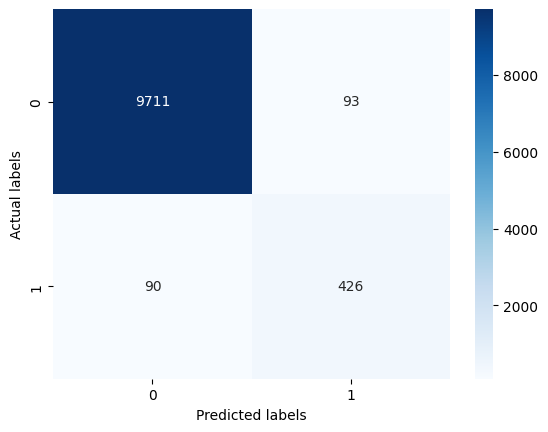

In [ ]:
actual_labels = submission31['Kemiripan']  # Replace 'actual_column_name' with your actual column name
predicted_labels = submission31['predict']

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(actual_labels, predicted_labels)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()

## Kernel 3 DropOut 0.3

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 3
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(x1)
x1 = Dropout(0.3)(x1)
x2 = lstm_layer(x2)
x2 = Dropout(0.3)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model32 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model32.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model32.summary()
utils.plot_model(model32, show_shapes=True, expand_nested=True)
cp32=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_3_03.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_20 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_9 (Embedding)     (None, 30, 100)              2726000   ['input_19[0][0]',            
                                                                     'input_20[0][0]']            
                                                                                                  
 conv1d_4 (Conv1D)           (None, 28, 258)              77658     ['embedding_9[0][0]',   

In [ ]:
history_f_cnnbilstm = model32.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp32]
)

Epoch 1/20
2575/2578 [============================>.] - ETA: 0s - loss: 0.2153 - accuracy: 0.9479 - precision_9: 0.0825 - recall_9: 0.0041
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_3_03.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - 38s 12ms/step - loss: 0.2152 - accuracy: 0.9479 - precision_9: 0.0825 - recall_9: 0.0041 - val_loss: 0.1550 - val_accuracy: 0.9500 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 2/20
2574/2578 [============================>.] - ETA: 0s - loss: 0.1353 - accuracy: 0.9554 - precision_9: 0.9550 - recall_9: 0.1134
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_3_03.hdf5
2578/2578 [==============================] - 31s 12ms/step - loss: 0.1352 - accuracy: 0.9554 - precision_9: 0.9552 - recall_9: 0.1137 - val_loss: 0.0863 - val_accuracy: 0.9687 - val_precision_9: 0.8814 - val_recall_9: 0.4330
Epoch 3/20
2574/2578 [============================>.] - ETA: 0s - loss: 0.0894 - accuracy: 0.9719 - precision_9: 0.9234 - recall_9: 0.4774
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_3_03.hdf5
2578/2578 [==============================] - 30s 12ms/step - l

In [ ]:
y_pred_test = model32.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission32 = test.copy()
submission32['Kemiripan'] = submission32['Kemiripan'].astype('float32')
submission32['predict'] = y_pred_test
submission32['predict'] = submission32['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission32.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnnbilstm_3_03.csv',index=False)

323/323 [==============================] - 3s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN-BiLSTM 20 Epoch 3 0.3')
print('---------------------------')
print(classification_report(submission32['Kemiripan'],submission32['predict']))
print('---------------------------')

Model Metrics for FastText+CNN-BiLSTM 20 Epoch 3 0.3
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.77      0.83      0.80       516

    accuracy                           0.98     10320
   macro avg       0.88      0.91      0.89     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission32['Accuracy'] = (submission32['Kemiripan'] == submission32['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission32['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.979360465116279


In [ ]:
submission32 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnnbilstm_3_03.csv')
submission32 = submission32.astype(str)

## Kernel 4 DropOut 0.5

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 4
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(x1)
x1 = Dropout(0.5)(x1)
x2 = lstm_layer(x2)
x2 = Dropout(0.5)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model33 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model33.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model33.summary()
utils.plot_model(model33, show_shapes=True, expand_nested=True)
cp33=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_4_05.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_20 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_9 (Embedding)     (None, 30, 100)              2726000   ['input_19[0][0]',            
                                                                     'input_20[0][0]']            
                                                                                                  
 conv1d_9 (Conv1D)           (None, 27, 258)              103458    ['embedding_9[0][0]',   

In [ ]:
history_f_cnnbilstm = model33.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp33]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.2480 - accuracy: 0.9472 - precision_9: 0.0618 - recall_9: 0.0039
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_4_05.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - 40s 13ms/step - loss: 0.2480 - accuracy: 0.9472 - precision_9: 0.0618 - recall_9: 0.0039 - val_loss: 0.1855 - val_accuracy: 0.9500 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 2/20
2574/2578 [============================>.] - ETA: 0s - loss: 0.1714 - accuracy: 0.9500 - precision_9: 1.0000 - recall_9: 2.4254e-04
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_4_05.hdf5
2578/2578 [==============================] - 30s 12ms/step - loss: 0.1713 - accuracy: 0.9500 - precision_9: 1.0000 - recall_9: 2.4248e-04 - val_loss: 0.1381 - val_accuracy: 0.9517 - val_precision_9: 0.5316 - val_recall_9: 0.2777
Epoch 3/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.1313 - accuracy: 0.9520 - precision_9: 0.9825 - recall_9: 0.0407
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_4_05.hdf5
2578/2578 [==============================] - 33s 13ms/

In [ ]:
y_pred_test = model33.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission33 = test.copy()
submission33['Kemiripan'] = submission33['Kemiripan'].astype('float32')
submission33['predict'] = y_pred_test
submission33['predict'] = submission33['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission33.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnnbilstm_4_05.csv',index=False)

323/323 [==============================] - 3s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN-BiLSTM 20 Epoch 4 0.5')
print('---------------------------')
print(classification_report(submission33['Kemiripan'],submission33['predict']))
print('---------------------------')

Model Metrics for FastText+CNN-BiLSTM 20 Epoch 4 0.5
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      9804
         1.0       0.71      0.85      0.77       516

    accuracy                           0.98     10320
   macro avg       0.85      0.92      0.88     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission33['Accuracy'] = (submission33['Kemiripan'] == submission33['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission33['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9751937984496124


In [ ]:
submission33 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnnbilstm_4_05.csv')
submission33 = submission33.astype(str)

## Kernel 5 DropOut 0.7

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 5
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(x1)
x1 = Dropout(0.7)(x1)
x2 = lstm_layer(x2)
x2 = Dropout(0.7)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model34 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model34.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model34.summary()
utils.plot_model(model34, show_shapes=True, expand_nested=True)
cp34=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_5_07.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 30, 100)              2726000   ['input_7[0][0]',             
                                                                     'input_8[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 26, 258)              129258    ['embedding_3[0][0]',   

In [ ]:
history_f_cnnbilstm = model34.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp34]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.3088 - accuracy: 0.9455 - precision_3: 0.0592 - recall_3: 0.0061
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_5_07.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - 38s 12ms/step - loss: 0.3088 - accuracy: 0.9455 - precision_3: 0.0592 - recall_3: 0.0061 - val_loss: 0.1922 - val_accuracy: 0.9500 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/20
2578/2578 [==============================] - ETA: 0s - loss: 0.1894 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_5_07.hdf5
2578/2578 [==============================] - 32s 12ms/step - loss: 0.1894 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.2005 - val_accuracy: 0.9294 - val_precision_3: 0.2888 - val_recall_3: 0.2816
Epoch 3/20
2576/2578 [============================>.] - ETA: 0s - loss: 0.1786 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_f_train_20ep_5_07.hdf5
2578/2578 [===========================

In [ ]:
y_pred_test = model34.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission34 = test.copy()
submission34['Kemiripan'] = submission34['Kemiripan'].astype('float32')
submission34['predict'] = y_pred_test
submission34['predict'] = submission34['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission34.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnnbilstm_5_07.csv',index=False)

323/323 [==============================] - 3s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN-BiLSTM 20 Epoch 5 0.7')
print('---------------------------')
print(classification_report(submission34['Kemiripan'],submission34['predict']))
print('---------------------------')

Model Metrics for FastText+CNN-BiLSTM 20 Epoch 5 0.7
---------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96      9804
         1.0       0.29      0.45      0.36       516

    accuracy                           0.92     10320
   macro avg       0.63      0.70      0.66     10320
weighted avg       0.94      0.92      0.93     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission34['Accuracy'] = (submission34['Kemiripan'] == submission34['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission34['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9186046511627907


In [ ]:
submission34 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_f_cnnbilstm_5_07.csv')
submission34 = submission34.astype(str)